In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pandas_datareader
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install interpret
!{sys.executable} -m pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=99268e9c654047053c03e377f403745b8284f8708d8981fc71ccd7f6605372a1
  Stored in directory: c:\users\alex\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,110.630081
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,111.863426
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,112.888023
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,113.001884
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,113.609047


In [3]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

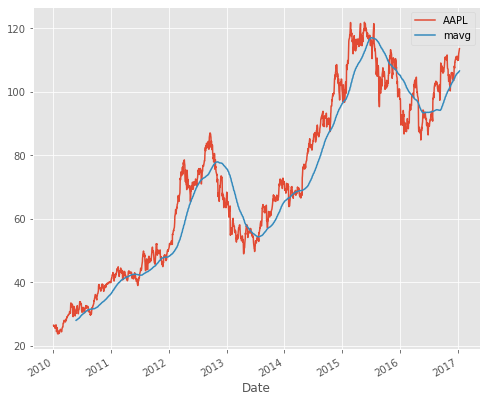

In [4]:
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [5]:
from sklearn.model_selection import train_test_split

train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label]

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

# X Values

In [6]:
print(X)

print(X_train)

                  High         Low        Open       Close       Volume
Date                                                                   
2010-01-04   30.642857   30.340000   30.490000   30.572857  123432400.0
2010-01-05   30.798571   30.464285   30.657143   30.625713  150476200.0
2010-01-06   30.747143   30.107143   30.625713   30.138571  138040000.0
2010-01-07   30.285715   29.864286   30.250000   30.082857  119282800.0
2010-01-08   30.285715   29.865715   30.042856   30.282858  111902700.0
...                ...         ...         ...         ...          ...
2017-01-05  116.860001  115.809998  115.919998  116.610001   22193600.0
2017-01-06  118.160004  116.470001  116.779999  117.910004   31751900.0
2017-01-09  119.430000  117.940002  117.949997  118.989998   33561900.0
2017-01-10  119.379997  118.300003  118.769997  119.110001   24462100.0
2017-01-11  119.930000  118.599998  118.739998  119.750000   27588600.0

[1769 rows x 5 columns]
                  High         Low     

# Y Values

In [7]:
print(y)

print(y_train)

Date
2010-01-04     26.419203
2010-01-05     26.464878
2010-01-06     26.043921
2010-01-07     25.995777
2010-01-08     26.168606
                 ...    
2017-01-05    110.630081
2017-01-06    111.863426
2017-01-09    112.888023
2017-01-10    113.001884
2017-01-11    113.609047
Name: Adj Close, Length: 1769, dtype: float64
Date
2016-06-15     91.193764
2013-06-21     52.142250
2015-09-24    106.273109
2015-06-02    119.556694
2013-02-26     56.242744
                 ...    
2012-11-05     72.480324
2013-08-08     58.517097
2014-05-13     76.687088
2010-12-08     39.628189
2014-03-24     69.252289
Name: Adj Close, Length: 1415, dtype: float64


In [8]:
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree

ebm = ExplainableBoostingRegressor(random_state=seed)
ebm.fit(X_train, y_train)

Exception: Platform win32 at 32 bit not supported for EBM

In [ ]:
from interpret import show
from interpret.data import Marginal

marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
show(marginal)

In [ ]:
from interpret import show

ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [ ]:
from interpret.glassbox import LinearRegression, RegressionTree

lr = LinearRegression(random_state=seed)
lr.fit(X_train, y_train)

rt = RegressionTree(random_state=seed)
rt.fit(X_train, y_train)

In [ ]:
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

In [ ]:
lr_perf = RegressionPerf(lr.predict).explain_perf(X_test, y_test, name='Linear Regression')
rt_perf = RegressionPerf(rt.predict).explain_perf(X_test, y_test, name='Regression Tree')

show(lr_perf)
show(rt_perf)
show(ebm_perf)

In [ ]:
lr_global = lr.explain_global(name='Linear Regression')
rt_global = rt.explain_global(name='Regression Tree')

show(lr_global)
show(rt_global)
show(ebm_global)

In [ ]:
show([lr_global, lr_perf, rt_global, rt_perf, ebm_global, ebm_perf])